In [25]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from keras.datasets import mnist
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [26]:
(train_images,train_labels) , (test_images,test_labels) = mnist.load_data()

In [27]:
# (train_images,train_labels) = mnist.load_data()

In [28]:
train_images.shape

(60000, 28, 28)

In [29]:
len(train_labels)

60000

In [30]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [31]:
test_images.shape

(10000, 28, 28)

In [32]:
len(test_labels)

10000

In [33]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

## The network Architecture.

In [10]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [11]:
# network = models.Sequential()
# network.add(layers.Dense(512, activation='relu', input_shape=(31 * 28,)))
# network.add(layers.Dense(10, activation='softmax'))

## The compilation step.

In [12]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [14]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [15]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/5





60000/60000 [==============================] - 6s 102us/step - loss: 0.2580 - acc: 0.9249
Epoch 2/5
60000/60000 [==============================] - 5s 89us/step - loss: 0.1039 - acc: 0.9695
Epoch 3/5
60000/60000 [==============================] - 6s 98us/step - loss: 0.0685 - acc: 0.9796
Epoch 4/5
60000/60000 [==============================] - 6s 95us/step - loss: 0.0505 - acc: 0.9849
Epoch 5/5
60000/60000 [==============================] - 6s 101us/step - loss: 0.0384 - acc: 0.9888


## 2.2 Data representations for neural networks

In [16]:
train_images.shape

(60000, 784)

In [17]:
train_images.ndim

2

In [18]:
train_images.dtype

dtype('float32')

## Displaying the fourth digit.

In [19]:
train_images[4]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

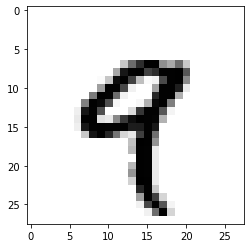

In [20]:
digit = train_images[4].reshape(28,28)
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

## The gears of neural networks: tensor operations.

In [21]:
# Relu.
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
        return x

In [22]:
# Addition.
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [23]:
x = np.arange(1,5)
y = np.arange(1,17).reshape(4,4)
print(x)
print()
print(y)

[1 2 3 4]

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]


In [24]:
x + y # Smaller tensor was broadcasted.

array([[ 2,  4,  6,  8],
       [ 6,  8, 10, 12],
       [10, 12, 14, 16],
       [14, 16, 18, 20]])

## Tensor dot.